# Hammock Arch Stand Designer

In [21]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'


import numpy as np
from scipy import optimize

## Constants

In [22]:
cm_inch_ratio = 2.54
inches_per_foot = 12 
ridgeline_hammock_ratio = 10/12
suspension_angle = 30
spacing_each_side_inch = 8
sit_height_inch = 18
n_radiant = 10000
n_radius = 100

## Hammmock properties

In [77]:
hammock_length_foot = 350 / cm_inch_ratio / 12
head_room_inch = 38.1

# hammock_length_foot = 11
# head_room_inch = 36.5

# hammock_length_foot = 300 / cm_inch_ratio / 12
# head_room_inch = 32.6

# hammock_length_foot = 280 / cm_inch_ratio / 12
# head_room_inch = 30.5

# hammock_length_foot = 260 / cm_inch_ratio / 12
# head_room_inch = 28.3

hammock_length_foot

11.48293963254593

In [78]:
ridgeline_length_inch = round(hammock_length_foot * inches_per_foot * ridgeline_hammock_ratio, 1)

horizontal_line_length_inch = ridgeline_length_inch + 2 * (spacing_each_side_inch / 2 * 3**0.5)
horizontal_line_height_inch = head_room_inch + sit_height_inch + (spacing_each_side_inch / 2)

ridgeline_length_inch, horizontal_line_length_inch, horizontal_line_height_inch

(114.8, 128.656406460551, 60.1)

## Radius range

In [79]:
arch_radius_min_inch = horizontal_line_length_inch / 2 + 1e-7
arch_radius_max_inch = horizontal_line_length_inch * 0.7

# arch_radius_min_inch = horizontal_line_length_inch * 0.6
# arch_radius_max_inch = horizontal_line_length_inch * 0.7

arch_radius_log = np.linspace(np.log(arch_radius_min_inch), np.log(arch_radius_max_inch), n_radius)
arch_radius_inch = np.exp(arch_radius_log)

## Plotting

In [80]:
def plot_hammock():    
    xy = (- horizontal_line_length_inch / 2 , 0)
    width = horizontal_line_length_inch
    height = horizontal_line_height_inch
    
    plt.gca().add_patch(plt.Rectangle(xy, width, height,alpha=1, color = 'g', fill=None)) 

In [81]:
def get_arch(r):
    x_center = 0
    y_center =  horizontal_line_height_inch - (np.sqrt(r**2 - (horizontal_line_length_inch / 2)**2))
    
    rad = np.linspace(-np.pi / 2, np.pi * 3/2, n_radiant)
    x = np.cos(rad) * r + x_center
    y = np.sin(rad) * r + y_center
    
    index = np.where(y < 0)
    x = np.delete(x, index)     
    y = np.delete(y, index)
    
    return x, y

In [82]:
def plot_circle(r):
    x, y = get_arch(r)  
    plt.plot(x, y, color = 'r', linewidth = 1) 

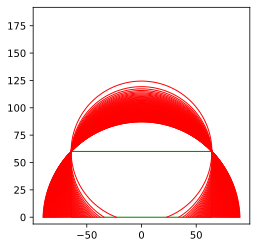

In [83]:
plot_hammock()

for i in range(len(arch_radius_inch)): 
    plot_circle(arch_radius_inch[i])

plt.axis('square');

## Perimeter

In [84]:
def get_perimeter(x, y):
    d =  np.sqrt(np.diff(x)**2 + np.diff(y)**2)
    p = np.sum(d)
    return p

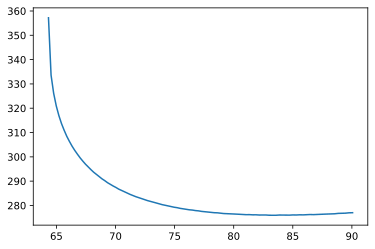

In [85]:
perimeters = [get_perimeter(*get_arch(r)) for r in arch_radius_inch]
plt.plot(arch_radius_inch, perimeters);

## Optimize

In [86]:
min_arch_r = arch_radius_inch[np.argmin(perimeters)]
print('Optimized arch radius (inch):', min_arch_r)

Optimized arch radius (inch): 83.57118497566641


In [87]:
min_arch_r / horizontal_line_length_inch

0.6495687799370585

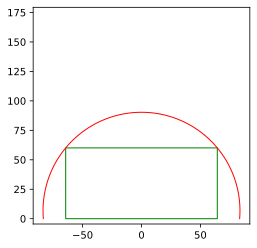

In [88]:
r = min_arch_r

plot_hammock()
plot_circle(r)
plt.axis('square');

## Arch Length

In [89]:
x, y = get_arch(r)
arch_length = get_perimeter(x, y)

print('Arch Length (inch):', arch_length )
print('Arch Length (cm):', arch_length * cm_inch_ratio )

Arch Length (inch): 275.9640902998346
Arch Length (cm): 700.9487893615799


In [90]:
index = np.where(y < horizontal_line_height_inch)
x_higher_than_hammock = np.delete(x, index)     
y_higher_than_hammock = np.delete(y, index)


length_higher_than_hammock = get_perimeter(x_higher_than_hammock, y_higher_than_hammock)
length_lower_than_hammock = (arch_length - length_higher_than_hammock) / 2

print('Arch Length Higher than Hammock (inch):', length_higher_than_hammock )
print('Arch Length Higher than Hammock (cm):', length_higher_than_hammock * cm_inch_ratio )

print('Arch Length Lower than Hammock (inch):', length_lower_than_hammock )
print('Arch Length Lower than Hammock (cm):', length_lower_than_hammock * cm_inch_ratio )

Arch Length Higher than Hammock (inch): 146.77823642017842
Arch Length Higher than Hammock (cm): 372.8167205072532
Arch Length Lower than Hammock (inch): 64.59292693982809
Arch Length Lower than Hammock (cm): 164.06603442716334


## Height

In [91]:
height = max(y)

print('Height (inch):', height )
print('Height (cm):', height * cm_inch_ratio )

Height (inch): 90.32302973565125
Height (cm): 229.42049552855417


## Width

In [92]:
width = max(x) - min(x)

print('Width (inch):', width )
print('Width (cm):', width * cm_inch_ratio )

Width (inch): 167.14236788888402
Width (cm): 424.5416144377654


## Cost

In [93]:
price_per_meter = 35

n_pipes = 2
cost = round(arch_length * cm_inch_ratio / 100 * price_per_meter * n_pipes)

print('Cost (NTD):', cost)

Cost (NTD): 491


## Design Summary

In [94]:
print('Hammock Length (foot):', round(hammock_length_foot, 1))
print('Hammock Length (cm):', round(hammock_length_foot * 12 * cm_inch_ratio, 1))
print('Ridgeline Length (inch):', round(ridgeline_length_inch, 1))
print('Ridgeline Length (cm):', round(ridgeline_length_inch * cm_inch_ratio, 1))
print('Head Room (inch):', head_room_inch) 
print('Head Room (cm):', round(head_room_inch * cm_inch_ratio, 1))
print()

print('Arch Length (cm):', round(arch_length * cm_inch_ratio, 1))
print('Horizontal Line Length (cm):', round(horizontal_line_length_inch * cm_inch_ratio, 1))
print('Horizontal Line Height (cm):', round(horizontal_line_height_inch * cm_inch_ratio, 1))
print('Arch Length Higher than Hammock (cm):', round(length_higher_than_hammock * cm_inch_ratio, 1))
print('Arch Length Lower than Hammock (cm):', round(length_lower_than_hammock * cm_inch_ratio, 1))
print('Height (cm):', round(height * cm_inch_ratio, 1))
print('Width (cm):', round(width * cm_inch_ratio, 1))
print('Cost (NTD):', cost)

Hammock Length (foot): 11.5
Hammock Length (cm): 350.0
Ridgeline Length (inch): 114.8
Ridgeline Length (cm): 291.6
Head Room (inch): 38.1
Head Room (cm): 96.8

Arch Length (cm): 700.9
Horizontal Line Length (cm): 326.8
Horizontal Line Height (cm): 152.7
Arch Length Higher than Hammock (cm): 372.8
Arch Length Lower than Hammock (cm): 164.1
Height (cm): 229.4
Width (cm): 424.5
Cost (NTD): 491
